In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.datasets import load_boston


In [4]:
boston = load_boston()


Text(0,0.5,'Number of houses')

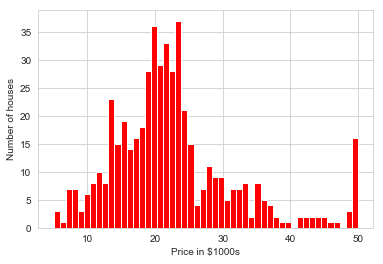

In [7]:
plt.hist(boston.target,bins=50,color='red')

plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')

Text(0.5,0,'Number of rooms')

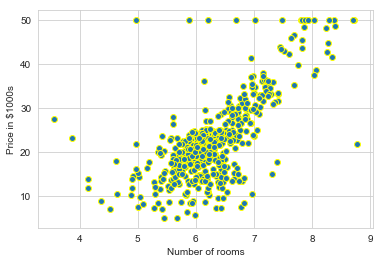

In [9]:
plt.scatter(boston.data[:,5],boston.target,edgecolors='yellow')

plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

In [11]:
boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


c:\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


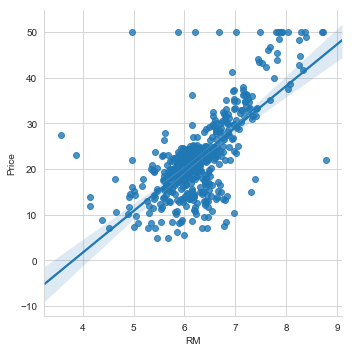

In [12]:
sns.lmplot('RM','Price',data = boston_df)


In [23]:
X = boston_df.RM
X = np.vstack(boston_df.RM)
X = np.array( [ [value,1] for value in X ] )


In [24]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
X_multi = boston_df.drop('Price',1)
Y_target = boston_df.Price
lreg.fit(X_multi,Y_target)
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)
print(' The number of coefficients used was %d ' % len(lreg.coef_))


 The estimated intercept coefficient is 36.46 
 The number of coefficients used was 13 


In [17]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [25]:
import sklearn
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,boston_df.Price)
reg = LinearRegression()

lreg.fit(X_train,Y_train)
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 45.43
Fit a model X_train, and calculate MSE with X_test and Y_test: 38.29


Text(0.5,1,'Residual Plots')

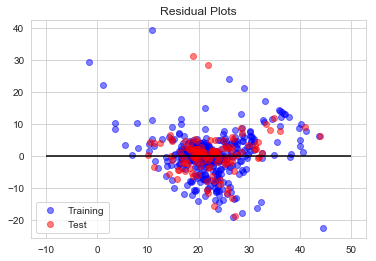

In [26]:
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

plt.hlines(y=0,xmin=-10,xmax=50)

plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

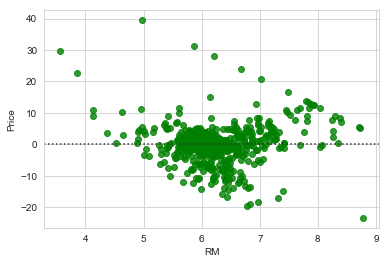

In [32]:
sns.residplot('RM', 'Price', data = boston_df,color='g')
